# Networks and their Structure: Network Science

## The SIRS Epidemic Model

We consider a simulation of the SIRS Epidemic Model.

We use the Watts-Strogatiz model from Topic 2.  Recall that is a circular lattice where, with probability $p$, each edge is *rewired*, that is, deleted and replaced with a random edge.

In [1]:
%run WS.ipynb

The following function simulates an SIRS epidemic in a WS graph.

The inputs are the network, the infectious period $t_I$, the recovery period $t_R$, the fraction of the population initially infected ``inf_fraction`` (chosen at random), and the number of time steps the simulation will run.

The output is the fraction of infected nodes at each time step.

Note that the model is defined slightly differently to in the lecture notes.   A susceptible node's probability of becoming infected depends on the number of infected neighbours it has.

In [2]:
def SIRS(ws_graph, tI, tR, inf_fraction, T, calculate_period=False):
    num_nodes = len(ws_graph)       #find size of graph
    state = {}                      #dictionary will record the state of each node
    for vertex in ws_graph:         #this is 0 if the node is susceptible; between 1 and tI if it is infectious,
        state[vertex] = 0           #and between tI+1 and tI+tR if it is recovering
    infected = random.sample(range(num_nodes), int(inf_fraction * num_nodes))   #a randomly chosen fraction of the nodes are infected
    for vertex in infected:
        state[vertex] = 1
    infection_rate = [inf_fraction] #data structure that will record the fraction of nodes infected at each time step
    new_state = {}                  #records the updated state of each node
    if calculate_period:            #measure the number of time steps between consecutive peaks of the infected fraction
        last_peak = inf_fraction    #assume initial rate is a peak
        going_up = False            #assume rate is falling 
        time_since_last_peak = 0    #first values found will be meaningless if assumption is false
        period = []                 #data structure to record steps between consecutive peaks 
    for time in range(T):                  
        num_infected = 0.0                                          #count number of nodes currently infected
        for vertex in ws_graph:                                     #look at each node
            if state[vertex] > 0:                                   #if node is in I or R
                if state[vertex] == tI + tR:                        #check to see if it has reached the end of the recovery period
                    new_state[vertex] = 0                           #and reset to susceptible
                else:
                    new_state[vertex] = state[vertex] + 1           #else increment the state
                    if new_state[vertex] <= tI: num_infected += 1   #if infected add to count
            else:                                                   #otherwise node is susceptible
                total_nbours = 0.0                                  
                inf_nbours = 0.0
                for neighbour in ws_graph[vertex]:
                    total_nbours += 1                               #count each neighbour
                    if state[neighbour] > 0 and state[neighbour] <= tI: 
                        inf_nbours += 1                             #and count no. of infected neighbours
                infection_prob = inf_nbours / total_nbours          #calculate probability of infection
                random_number = random.random()
                if infection_prob > random_number:                  #if node is newly infected
                    new_state[vertex] = 1                           #update state
                    num_infected += 1                               #and add to count
                else:
                    new_state[vertex] = 0                           #if not infected state is still zero
        state = new_state                                           #update all states
        infection_rate += [num_infected / num_nodes]                #calculate infection rate
        
        if calculate_period:        #check if peak has just been passed
            time_since_last_peak +=1
            if going_up == False and infection_rate[-1] > infection_rate[-2]: #check if trough has been passed
                going_up = True
            if going_up == True and infection_rate[-1] < infection_rate[-2]: #check if peak has been passed
                going_up = False
                period += [time_since_last_peak]
                time_since_last_peak = 0
        if time % 100 == 0:
            print (time, infection_rate[-1])
    if calculate_period:
        print (period)
        print ()
    return infection_rate

And here is a function for plotting.

In [3]:
import matplotlib.pyplot as plt
import textwrap


def plot_inf_vs_time(num_nodes, clockwise_neighbours, rewiring_prob, tI, tR, inf_fraction, time, output_file='test.png', show=False):
    """plots infection rate in a WS-graph against time using the SIRS model"""
    g = make_ws_graph(num_nodes, clockwise_neighbours, rewiring_prob)
    xdata = range(time+1)[time-100:]
    ydata = SIRS(g, tI, tR, inf_fraction, time, calculate_period=True)[time-100:]
    plt.clf() #clears plot
    plt.xlabel('time')
    plt.ylabel('infection rate')
    title = str('Infection in WS graph on ' + str(num_nodes)+' nodes with '+ str(clockwise_neighbours*2) + \
                ' lattice neighbours and rewiring prob '+ \
                str(rewiring_prob) + ' using SIRS model with infection time ' + str(tI)+ ', recovery time '+ str(tR))
    plt.title('\n'.join(textwrap.wrap(title,75)))
    plt.plot(xdata, ydata, marker='.', linestyle='-', color='r')
    plt.savefig(output_file)
    if show: plt.show()

0 0.1926
100 0.077
200 0.0696
300 0.0694
400 0.0692
500 0.0641
600 0.057
700 0.0774
800 0.0725
900 0.0707
[5, 13, 6, 5, 2, 4, 5, 2, 5, 5, 4, 6, 4, 3, 2, 5, 5, 5, 14, 7, 2, 10, 2, 5, 8, 5, 2, 4, 2, 4, 9, 4, 2, 6, 2, 5, 2, 2, 4, 5, 2, 5, 5, 11, 8, 5, 2, 5, 4, 6, 5, 4, 2, 2, 4, 8, 10, 5, 5, 2, 8, 4, 4, 2, 2, 6, 12, 7, 2, 5, 5, 4, 2, 2, 9, 8, 6, 2, 4, 6, 2, 4, 9, 6, 7, 7, 9, 7, 6, 12, 4, 8, 3, 6, 4, 6, 3, 8, 6, 6, 3, 9, 8, 5, 2, 6, 7, 8, 6, 2, 2, 2, 6, 9, 5, 15, 4, 8, 8, 4, 6, 3, 4, 12, 6, 5, 2, 5, 6, 6, 2, 10, 5, 6, 4, 9, 2, 2, 5, 5, 4, 4, 2, 9, 6, 7, 2, 2, 6, 4, 8, 6, 3, 2, 4, 10, 8, 12, 9, 2, 2, 4, 5, 2, 6, 6, 7, 8, 7, 4, 7, 11, 10, 2, 6, 2, 6, 2, 5, 2, 7, 6, 4, 2, 7, 7, 4]



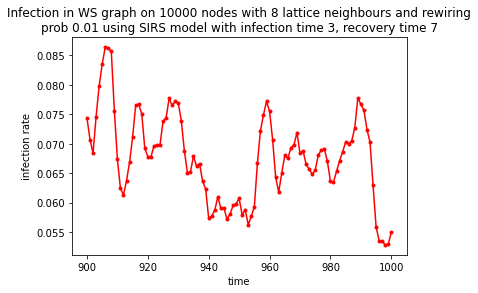

In [4]:
plot_inf_vs_time(10000, 4, 0.01, 3, 7, 0.1, 1000)

0 0.1935
100 0.054
200 0.0852
300 0.1306
400 0.2248
500 0.2755
600 0.3352
700 0.2949
800 0.1985
900 0.0813
[5, 21, 17, 17, 17, 17, 17, 17, 17, 16, 17, 16, 16, 17, 16, 16, 16, 16, 16, 16, 17, 16, 16, 17, 16, 17, 16, 17, 17, 16, 16, 17, 16, 16, 17, 17, 15, 17, 17, 16, 16, 16, 17, 16, 16, 17, 16, 17, 15, 16, 16, 16, 17, 16, 16, 16, 17, 16, 16, 16, 16]



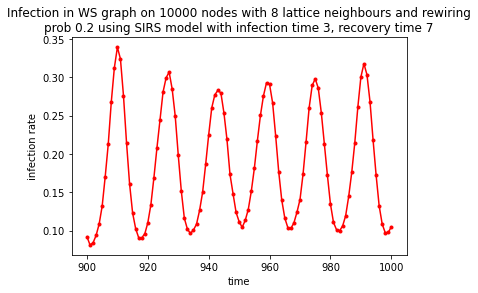

In [5]:
plot_inf_vs_time(10000, 4, 0.2, 3, 7, 0.1, 1000)

Note the function ``SIRS`` also calculates the period of the oscillations -- these are printed out above the plot.